### Analyse der Sonnenfleckenaktivität durch Zeit-Frequenz-Analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot
from pandas import Series
import scipy.signal as sp
from scipy.signal import chirp
import numpy as np
#from spectrum import *
%matplotlib inline
from stockwell import st

Die Aktivität der Sonnenflecken besitzt Einflüsse auf das Erdmagnetfeld, das Weltraumwetter, welches für den Betrieb von Satelliten wichtig ist und auch für den Betrieb elektrischer Einrichtungen und von Telekommunikationsanlagen auf der Erde.
In früheren Zeiten konnte auch ein Einfluss auf das Erdklima beobachtet werden, in der jüngeren Vergangenheit dominiert hier jedoch der vom Menschen verursachte Klimawandel. 

Die Anzahl der Sonnenflecken pro Jahr wird seit 1749 gezählt und steht inzwischen auch zum Download bereit:
https://www.sidc.be/SILSO/datafiles

In [2]:
testdata = pd.read_csv("SN_y_tot_V2.0.csv",delimiter ="; ", engine = 'python') # Jährliche Zählung
#testdata = pd.read_csv("SN_m_tot_V2.0.csv",delimiter =";", engine = 'python') # Monatliche Zählung
testdata.head()

,Year,Sunspots,C3,C4,C5
0,1700.5,8.3,-1.0;-1;1,NaN,NaN
1,1701.5,18.3,-1.0;-1;1,NaN,NaN
2,1702.5,26.7,-1.0;-1;1,NaN,NaN
3,1703.5,38.3,-1.0;-1;1,NaN,NaN
4,1704.5,60.0,-1.0;-1;1,NaN,NaN


In [3]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      321 non-null    float64
 1   Sunspots  321 non-null    float64
 2   C3        321 non-null    object 
 3   C4        0 non-null      float64
 4   C5        0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 12.7+ KB


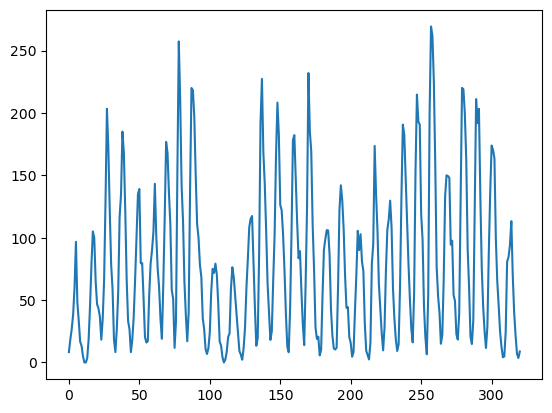

In [4]:
#testdata.plot(y='Sunspots')
plt.figure()
plt.plot(testdata.Sunspots)

Parametrierung der Stockwell Transformation: Zeit- und Frequenzachse

Für die Analyse der Dynamik ist der Mittelwert der Zeitreihe hinderlich und wird entfernt:

In [5]:
testdata['Sunspots_AC'] = testdata.Sunspots - testdata.Sunspots.mean()

In [6]:
timeseries = testdata.Sunspots_AC
fmin = 0 # 1/ Jahre
fmax = 0.5 # 1/ Jahre (Periode ca. 10 Jahre)
t = testdata.Year
df = 1./(t[len(t)-1]-t[0]) # Frequenzauflösung =  1/(Zeitumfang der Zeitreihe)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)

In [7]:
print("Frequenzauflösung in a/Jahre:",df)

Frequenzauflösung in a/Jahre: 0.003125


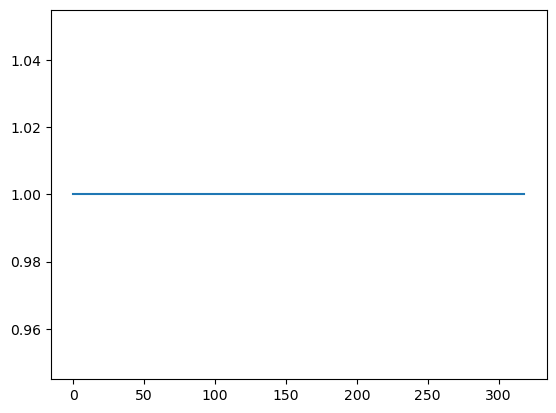

In [8]:
# Testen der Gleichmäßigkeit der Abtastung
tlist = t.array 
ts = tlist[1:-1] - tlist[0:-2]
plt.plot(1/ts)

In [9]:
# t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
# fmin = 0  # Hz
# fmax = 25  # Hz
# fs = 1./(t[1] - t[0])
# df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
# fmin_samples = int(fmin/df)
# fmax_samples = int(fmax/df)
# timeseries = w

Ausführen der Transformation

In [10]:
stock = st.st(timeseries, fmin_samples, fmax_samples)

In [11]:
stock.shape

(161, 321)

Plot 

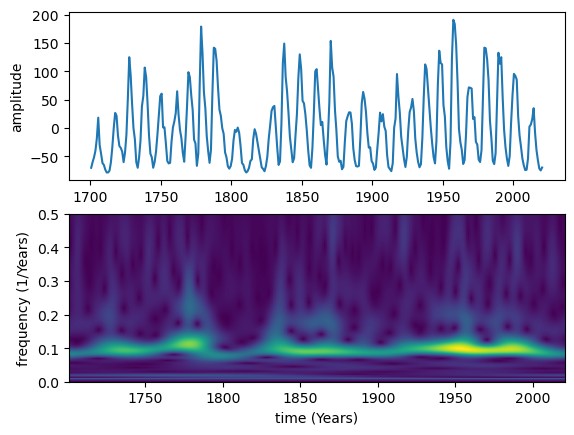

In [12]:
extent = (t[0], t[len(t)-1], fmin, fmax)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(stock) , shading='gouraud')
ax[1].axis('tight')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
plt.show()

In [13]:
ff, tt, spectrogram = sp.spectrogram(timeseries, nperseg = 128, noverlap = 64, fs = 1)

In [14]:
spectrogram.shape

(65, 4)

In [15]:
# Frequenzbereich dem des Stockwell-Diagramms angleichen
# ff auf fmax verkürzen
# spectrogram abschneiden
spectrogram = spectrogram[ff  < fmax,:]

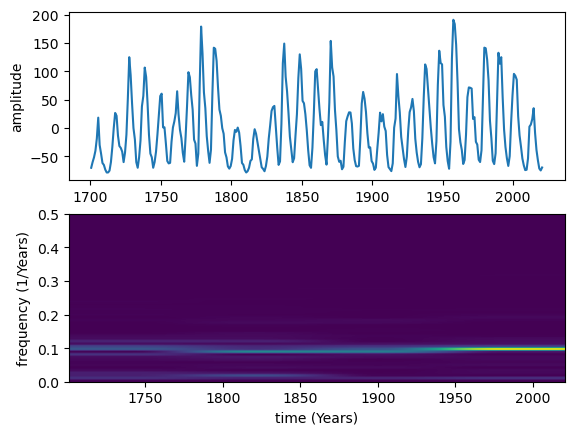

In [16]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(spectrogram), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(spectrogram) , shading='gouraud')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
#ax[1].set_ylim([fmin, fmax])
#ax[1].set_xlim([t[0], t[len(t)-1]])
ax[1].axis('tight')
plt.show()

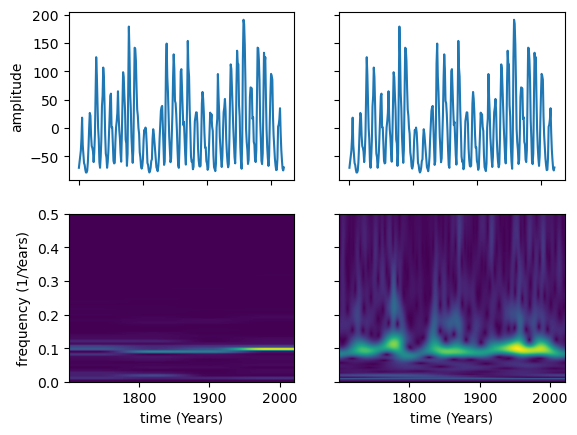

In [17]:
fig, ax = plt.subplots(2, 2)
# Plot Spectrogram
ax[0,0].plot(t, timeseries)
ax[0,0].set(ylabel='amplitude')
ax[1,0].imshow(np.abs(spectrogram), origin='lower', extent=extent)
ax[1,0].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
ax[1,0].axis('tight')
# Plot Stockwell 
ax[0,1].plot(t, timeseries)
ax[0,1].set(ylabel='amplitude')
ax[1,1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1,1].axis('tight')
ax[1,1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
plt.show()

In [18]:
testdata.head()

,Year,Sunspots,C3,C4,C5,Sunspots_AC
0,1700.5,8.3,-1.0;-1;1,NaN,NaN,-70.217134
1,1701.5,18.3,-1.0;-1;1,NaN,NaN,-60.217134
2,1702.5,26.7,-1.0;-1;1,NaN,NaN,-51.817134
3,1703.5,38.3,-1.0;-1;1,NaN,NaN,-40.217134
4,1704.5,60.0,-1.0;-1;1,NaN,NaN,-18.517134


<Axes: xlabel='Year'>

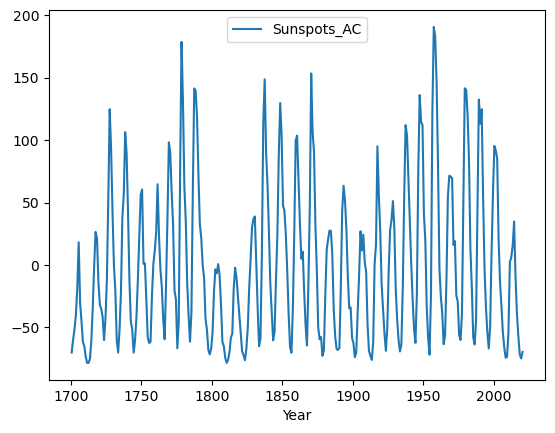

In [19]:
testdata.plot(x='Year',y='Sunspots_AC')

Ein autoregressives Modell nach Yule-Walker kann mit vorhandenen Funktionen, bspw aus dem Paket spectrum berechnet werden.

In [20]:
#AR, P, k = aryule(testdata.Sunspots_AC, 2)

Alternativ kann 

$u(k) = b_1 u(k-1) + b_2 u(k-2) + v(k) $

In [21]:
# Aufbau der Regressionsmatrix und des Vektors für die rechte Seite
phi = np.zeros((len(testdata.Sunspots_AC),2))
u = np.zeros((len(testdata.Sunspots_AC),1))
 
for i in range(2,len(testdata.Sunspots_AC)): # Auftellen des Gleichungssystemes: p[0]= a,p[1]= b
    phi[i,0] = testdata.Sunspots_AC[i-1]
    phi[i,1] = testdata.Sunspots_AC[i-2]
    u[i,0] = testdata.Sunspots_AC[i]
  
AR, residuals, rank, s = np.linalg.lstsq(phi,u,-1)

AR = -AR

In [22]:
print(s)

[1491.48102376  471.85693477]


Transformation in den Frequenzbereich: Berechnung des Leistungsdichtespektrums. Es ergibt sich eine Darstellung mit einer Frequenz in der Einheit [1/Jahre] Entsprechend kann die Periodizität im Diagramm einfach abgelesen werden

Die Periodendauer kann aber auch direkt aus den Parametern bestimmt werden. Hierzu wird die Nullstelle des charakteristischen Polynoms berechnet.

In [23]:
AR

array([[-1.38530008],
       [ 0.69292643]])

In [24]:
ARpoly = np.append(1, AR)
print(ARpoly)

[ 1.         -1.38530008  0.69292643]


In [25]:
p = np.roots(ARpoly)
print(p)

[0.69265004+0.46169509j 0.69265004-0.46169509j]


In [26]:
f = 1/(2*np.pi) * np.arctan(np.imag(p[0])/np.real(p[0]))

In [27]:
print(1/f)

10.686942783324046
